Fraud detection prototype</br>
Data set: </br>
Models:</br>
   <li> Random Forest</li>
   <li> Deep Neural Network</li>
   <li> AutoEncoder</li>
<hr>
<ul>
<li> Author: <a href:https://www.linkedin.com/in/babak-emami/> Babak.EA </a> </li>
<li>LinkedIn: <a href:https://www.linkedin.com/in/babak-emami/> https://www.linkedin.com/in/babak-emami/</a> </li>
<li>YouTube: <a href:https://www.youtube.com/channel/UCBqqRv8vWV3NZFF2tQV4e-w?view_as=subscriber>YouTube</a></li>
</ul>
 
    

# 1) Requirments

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os                                                                                                            
import matplotlib as mpl                                                                                             
                                                                   
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

import pandas_profiling as pp
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
df = pd.read_csv('./data/sample_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99682 entries, 0 to 99681
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99682 non-null  int64  
 1   V1      99682 non-null  float64
 2   V2      99682 non-null  float64
 3   V3      99682 non-null  float64
 4   V4      99682 non-null  float64
 5   V5      99682 non-null  float64
 6   V6      99682 non-null  float64
 7   V7      99682 non-null  float64
 8   V8      99682 non-null  float64
 9   V9      99682 non-null  float64
 10  V10     99682 non-null  float64
 11  V11     99682 non-null  float64
 12  V12     99682 non-null  float64
 13  V13     99682 non-null  float64
 14  V14     99682 non-null  float64
 15  V15     99682 non-null  float64
 16  V16     99682 non-null  float64
 17  V17     99682 non-null  float64
 18  V18     99682 non-null  float64
 19  V19     99682 non-null  float64
 20  V20     99682 non-null  float64
 21  V21     99682 non-null  float64
 22

In [3]:
df.describe(include ='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,...,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000,99682.000000
mean,94798.037078,0.008163,-0.005368,-0.004522,0.007158,0.001509,-0.002155,0.004038,-0.004695,0.003568,...,0.000451,0.001599,0.002884,0.001352,0.000716,0.000199,0.001385,-0.000018,88.433730,0.001776
std,47416.793453,1.965954,1.659255,1.515297,1.416177,1.403126,1.345341,1.261348,1.188689,1.097291,...,0.731259,0.724259,0.632141,0.605025,0.523588,0.481149,0.416635,0.340415,250.938299,0.042101
min,0.000000,-56.407510,-72.715728,-48.325589,-5.251492,-113.743307,-26.160506,-33.239328,-50.943369,-10.842526,...,-22.665685,-8.887017,-36.666000,-2.836627,-6.712624,-2.068561,-22.565679,-15.430084,0.000000,0.000000
25%,54124.000000,-0.917885,-0.598121,-0.892980,-0.846057,-0.689279,-0.770159,-0.549031,-0.211940,-0.639257,...,-0.228677,-0.539844,-0.161013,-0.353017,-0.316248,-0.326655,-0.070680,-0.053144,5.490000,0.000000
50%,84733.500000,0.032572,0.061265,0.174201,-0.013067,-0.052961,-0.276475,0.041998,0.020774,-0.048409,...,-0.028725,0.010839,-0.009853,0.041208,0.018706,-0.049412,0.000936,0.011194,21.980000,0.000000
75%,139168.000000,1.321195,0.797856,1.025762,0.745322,0.611223,0.395895,0.568307,0.323695,0.599959,...,0.186079,0.530462,0.147817,0.440638,0.350994,0.239654,0.090426,0.077613,77.897500,0.000000
max,172792.000000,2.454930,18.183626,9.382558,16.491217,34.801666,73.301626,120.589494,19.587773,15.594995,...,27.202839,8.272233,22.083545,4.584549,7.519589,3.415636,31.612198,33.847808,25691.160000,1.000000


In [5]:

df['Class'].value_counts()

0    99505
1      177
Name: Class, dtype: int64

In [6]:
# divide full data into features and label
spl1 = 0.3
spl2 = 0.3
X = df.loc[:, df.columns != 'Class']
y = df.loc[:, df.columns == 'Class']
# create train, test and validate datasets

# first split original into Train and Test+Val
X_train, X_test1, y_train, y_test1 = train_test_split(X,y, test_size = spl1, random_state = None, shuffle=True)
# then split Test+Val into Test and Validate
# Validate will only be used in the 2 Model system (explained below)
X_test, X_val, y_test, y_val = train_test_split(X_test1,y_test1, test_size = spl2, random_state = None, shuffle=True)

class_names=[0,1] # name  of classes 1=fraudulent transaction

y_val['Class'].value_counts()

0    8949
1      23
Name: Class, dtype: int64

In [7]:
# Undersampeling

In [8]:
# find the number of minority (value=1) samples in our train set so we can down-sample our majority to it
yes = len(y_train[y_train['Class'] ==1])

# retrieve the indices of the minority and majority samples 
yes_ind = y_train[y_train['Class'] == 1].index
no_ind = y_train[y_train['Class'] == 0].index

# random sample the majority indices based on the amount of 
# minority samples
new_no_ind = np.random.choice(no_ind, yes, replace = False)

# merge the two indices together
undersample_ind = np.concatenate([new_no_ind, yes_ind])

# get undersampled dataframe from the merged indices of the train dataset
X_train = X_train.loc[undersample_ind]
y_train = y_train.loc[undersample_ind]

y_train = np.array(y_train).flatten()
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
def visualize(Actual, Pred, Algo):
    #Confusion Matrix
    cnf_matrix=metrics.confusion_matrix(Actual, Pred) #

    #Visualize confusion matrix using heat map

    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix: '+Algo, y=1.1) 
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [10]:
def display_metrics(model_name, train_features, test_features, train_label, test_label, pred, algo):
    model_probs = model_name.predict_proba(test_features)
    n = model_name.predict_proba(test_features).shape[1]-1
    model_probs = model_probs[:, n]
    try:
        print(model_name.score(test_features, test_label)) 
        print("Accuracy score (training): {0:.3f}".format(model_name.score(train_features, train_label))) 
        print("Accuracy score (validation): {0:.3f}".format(model_name.score(test_features, test_label))) 
    except Exception as e:
        print("error")  
    try:
        print(pd.Series(model_name.feature_importances_, index=train_features.columns[:]).nlargest(10).plot(kind='barh')) 
    except Exception as e:
        print("error") 
    print("Confusion Matrix:")
    tn, fp, fn, tp = confusion_matrix(test_label, pred).ravel()
    total = tn+ fp+ fn+ tp 
    print("false positive pct:",(fp/total)*100) 
    print("tn", " fp", " fn", " tp") 
    print(tn, fp, fn, tp) 
    print(confusion_matrix(test_label, pred)) 
    print("Classification Report") 
    print(classification_report(test_label, pred))
    print("Specificity =", tn/(tn+fp))
    print("Sensitivity =", tp/(tp+fn))
    y=np.reshape(test_label.to_numpy(), -1)
    fpr, tpr, thresholds = metrics.roc_curve(y, model_probs, pos_label=1)
    cm_results.append([algo, tn, fp, fn, tp])
    cr_results.append([algo, classification_report(test_label, pred)])
    roc.append([algo, fpr, tpr, thresholds])
    # AUC score should be (Sensitivity+Specificity)/2
    print(algo + ':TEST | AUC Score: ' + str( round(metrics.auc(fpr, tpr),3 )))
    return tn, fp, fn, tp

In [11]:
def auc_roc_metrics(model, test_features, test_labels, algo): # model object, features, actual labels, name of algorithm
    # useful for imbalanced data
    ns_probs = [0 for _ in range(len(test_labels))]
    # predict probabilities
    model_probs = model.predict_proba(test_features)
    # keep probabilities for the positive outcome only
    n = model.predict_proba(test_features).shape[1]-1
    model_probs = model_probs[:, n]  
    model_auc = auc_roc_metrics_plots(model_probs, ns_probs, test_labels, algo) 
    return model_auc

In [12]:
def auc_roc_metrics_plots(model_probs, ns_probs, test_labels, algo):
    
    # calculate scores
    ns_auc = roc_auc_score(test_labels, ns_probs) # no skill
    model_auc = round(roc_auc_score(test_labels, model_probs), 3)

    # summarize scores
    print('%10s : ROC AUC=%.3f' % ('No Skill',ns_auc))
    print('%10s : ROC AUC=%.3f' % (algo,model_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
    # NameError: name 'ns_probs' is not defined
    model_fpr, model_tpr, _ = roc_curve(test_labels, model_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(model_fpr, model_tpr, marker='.', label='%s (area = %0.2f)' % (algo, model_auc))
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    pyplot.title('Receiver Operating Characteristic curve')
    # show the plot
    pyplot.show()
    return model_auc

In [13]:
# Define our custom loss function
def focal_loss(y_true, y_pred):
    gamma = 2.0
    alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

In [14]:
def prediction_cutoff(model, test_features, cutoff):
    model.predict_proba(test_features)
    # to get the probability in each class, 
    # for example, first column is probability of y=0 and second column is probability of y=1.

    # the probability of being y=1
    prob1=model.predict_proba(test_features)[:,1]
    predicted=[1 if i > cutoff else 0 for i in prob1]
    return predicted

In [15]:
metrics_results = {}
roc = []
cm_results = []
cr_results = []


In [ ]:
# random Forest


In [16]:
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train, sample_weight=np.where(y_train == 1,1.0,1.0).flatten())
rf_Pred=rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20884
           1       0.06      0.82      0.11        49

    accuracy                           0.97     20933
   macro avg       0.53      0.89      0.55     20933
weighted avg       1.00      0.97      0.98     20933

0.9693307218267807
Accuracy score (training): 1.000
Accuracy score (validation): 0.969
AxesSubplot(0.125,0.125;0.775x0.755)
Confusion Matrix:
false positive pct: 3.02393350212583
tn  fp  fn  tp
20251 633 9 40
[[20251   633]
 [    9    40]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20884
           1       0.06      0.82      0.11        49

    accuracy                           0.97     20933
   macro avg       0.53      0.89      0.55     20933
weighted avg       1.00      0.97      0.98     20933

Specificity = 0.9696897146140586
Sensitivity = 0.8163265306122449
RF:TEST | AUC Scor

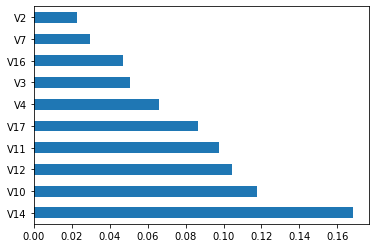

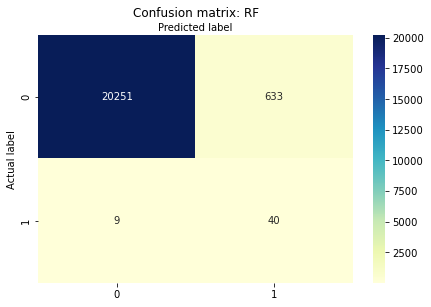

  No Skill : ROC AUC=0.500
        RF : ROC AUC=0.966


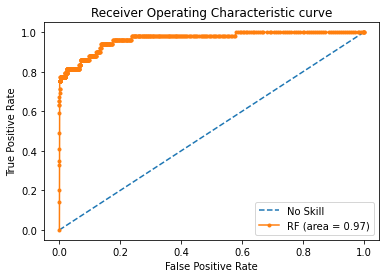

In [17]:
print(classification_report(y_test, rf_Pred))
tn, fp, fn, tp = display_metrics(rf, X_train, X_test, y_train, y_test, rf_Pred, 'RF')
visualize(y_test, rf_Pred, 'RF')
rf_auc = auc_roc_metrics(rf, X_test, y_test, 'RF')
metrics_results['rf'] = rf_auc

# Neural Networks

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Embedding
#from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K
from keras.layers import Conv1D
from keras.layers import BatchNormalization
from keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

Using TensorFlow backend.


In [19]:
#### swish activation function code for possible use later, can compare to relu, etc

# create new activation function
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [20]:
# add this function to the list of Activation functions
get_custom_objects().update({'swish': Activation(swish)})
# prepare data for model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)







 **** Run CNN 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 21, 32)            352       
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 32)            128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9, 64)             4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 64)             256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 

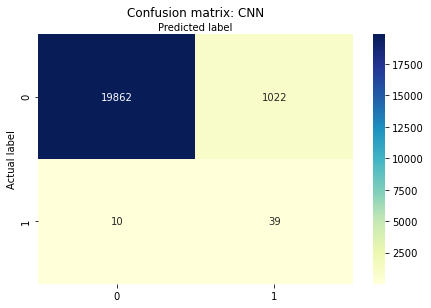

  No Skill : ROC AUC=0.500
       CNN : ROC AUC=0.921


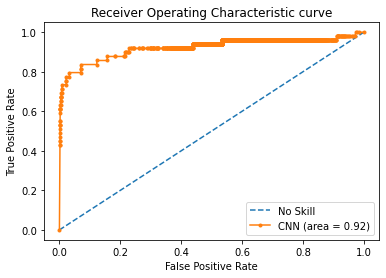

In [21]:

#Create the models to be used layer, using Sequential()
def create_dnn():
    # input_dim must equal number of features in X_train and X_test dataset
    clf1 = Sequential([
        Dense(units=16, kernel_initializer='uniform', input_dim=30, activation='relu'),
        Dense(units=18, kernel_initializer='uniform', activation='relu'),
        Dropout(0.25),
        Dense(20, kernel_initializer='uniform', activation='relu'),
        Dense(24, kernel_initializer='uniform', activation='relu'),
        Dense(1, kernel_initializer='uniform', activation='sigmoid')
    ])
    return clf1
def create_simple_dnn():
    # input_dim must equal number of features in X_train and X_test dataset
    clf1 = Sequential([
        Dense(units=16, kernel_initializer='uniform', input_dim=30, activation='relu'),
        Dense(units=18, kernel_initializer='uniform', activation='relu'),
        Dense(1, kernel_initializer='uniform', activation='sigmoid')
    ])
    return clf1
def create_complex_dnn():
    # input_dim must equal number of features in X_train and X_test dataset
    clf1 = Sequential([
        Dense(units=16, kernel_initializer='uniform', input_dim=30, activation='relu'),
        Dense(units=18, kernel_initializer='uniform', activation='relu'),
        Dropout(0.10),
        Dense(units=30, kernel_initializer='uniform', activation='relu'),
        Dense(units=28, kernel_initializer='uniform', activation='relu'),
        Dropout(0.10),
        Dense(units=30, kernel_initializer='uniform', activation='relu'),
        Dense(units=28, kernel_initializer='uniform', activation='relu'),
        Dropout(0.10),
        Dense(units=20, kernel_initializer='uniform', activation='relu'),
        Dense(units=24, kernel_initializer='uniform', activation='relu'),
        Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
    ])
    return clf1
def create_cnn():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=10, strides=1, activation='relu', padding='valid', input_shape=input_shape ))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model


print(" **** Run CNN ")

####run the CNN model

input_shape = (X_train.shape[1], 1)
clf = create_cnn()

# reshape data for CNN expected input
nrows, ncols = X_train.shape # (602,30)
X_train_arr = X_train.copy()
y_train_arr = y_train.copy()
X_train_arr = X_train_arr.reshape(nrows, ncols, 1)

nrows, ncols = X_test.shape # (602,30)
X_test_arr = X_test.copy()
y_test_arr = y_test.copy()
X_test_arr = X_test_arr.reshape(nrows, ncols, 1)

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf.summary()
clf.fit(X_train_arr, y_train_arr, epochs=200, verbose=0, sample_weight=np.where(y_train_arr == 1,1.0,1.0).flatten())


# check model metrics



score = clf.evaluate(X_train_arr, y_train_arr, batch_size=128)
print('\nAnd the Train Score is ', score[1] * 100, '%')
score = clf.evaluate(X_test_arr, y_test_arr, batch_size=128)
print('\nAnd the Test Score is ', score[1] * 100, '%')
# predict probabilities for test set
yhat_probs = clf.predict(X_test_arr, verbose=0)
# predict crisp classes for test set
yhat_classes = clf.predict_classes(X_test_arr, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print("Classification Report (CNN)") 
print(classification_report(y_test_arr, yhat_classes))

tn, fp, fn, tp = display_metrics(clf, X_train_arr, X_test_arr, y_train_arr, y_test_arr, yhat_classes, 'CNN')
visualize(y_test_arr, yhat_classes, 'CNN')
cnn_auc = auc_roc_metrics(clf, X_test_arr, y_test_arr, 'CNN')
metrics_results['cnn'] = cnn_auc

In [22]:
##### Now run the basic DNN (Deep Neural Network)



In [23]:
clf = create_dnn()
clf.summary()
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#adam = keras.optimizers.Adam(learning_rate=0.001)
# try using focal_loss to give heavier weight to examples that are difficult to classify
# seems to improve the metrics slightly
#clf.compile(optimizer=adam, loss=[focal_loss], metrics=['accuracy'])

# create/fit model on the training dataset
#clf.fit(X_train, y_train, batch_size=16, epochs=32, sample_weight=np.where(y_train == 1,0.2,1.0).flatten())
clf.fit(X_train, y_train, epochs=100, verbose=0.1, sample_weight=np.where(y_train == 1,1.0,1.0).flatten())



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_4 (Dense)              (None, 18)                306       
_________________________________________________________________
dropout_4 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
____________________________________________________

210/210 [==============================] - 0s 190us/step

And the Train Score is  98.57142567634583 %
20933/20933 [==============================] - 0s 6us/step

And the Test Score is  92.05560684204102 %
Classification Report (DNN)
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     20884
           1       0.03      0.88      0.05        49

    accuracy                           0.92     20933
   macro avg       0.51      0.90      0.50     20933
weighted avg       1.00      0.92      0.96     20933

error
error
Confusion Matrix:
false positive pct: 7.91573114221564
tn  fp  fn  tp
19227 1657 6 43
[[19227  1657]
 [    6    43]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     20884
           1       0.03      0.88      0.05        49

    accuracy                           0.92     20933
   macro avg       0.51      0.90      0.50     20933
weighted avg     

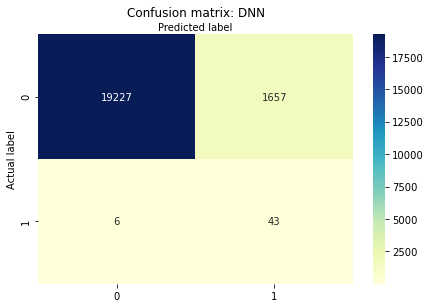

  No Skill : ROC AUC=0.500
       DNN : ROC AUC=0.951


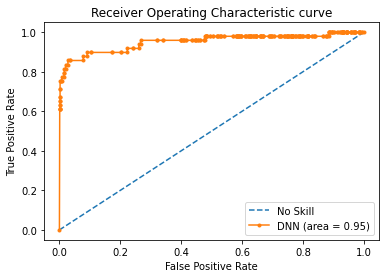

In [24]:
# check model metrics
score = clf.evaluate(X_train, y_train, batch_size=128)
print('\nAnd the Train Score is ', score[1] * 100, '%')
score = clf.evaluate(X_test, y_test, batch_size=128)
print('\nAnd the Test Score is ', score[1] * 100, '%')
# predict probabilities for test set
yhat_probs = clf.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = clf.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print("Classification Report (DNN)") 
print(classification_report(y_test, yhat_classes))

tn, fp, fn, tp = display_metrics(clf, X_train, X_test, y_train, y_test, yhat_classes, 'DNN')
visualize(y_test, yhat_classes, 'DNN')
dnn_auc = auc_roc_metrics(clf, X_test, y_test, 'DNN')
metrics_results['dnn'] = dnn_auc

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_9 (Dense)              (None, 18)                306       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 19        
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________
210/210 [==============================] - 0s 114us/step

And the Train Score is  93.33333373069763 %
20933/20933 [==============================] - 0s 7us/step

And the Test Score is  98.89647960662842 %
Classification Report (DNN Simple)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20884
           1       0.15      0.78    

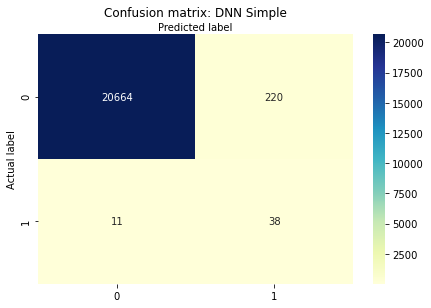

  No Skill : ROC AUC=0.500
DNN-Simple : ROC AUC=0.953


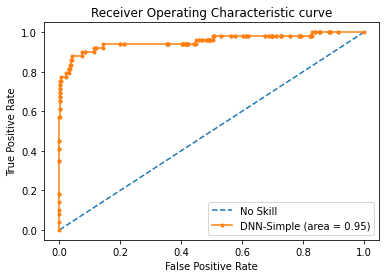

In [25]:
clf = create_simple_dnn()
clf.summary()
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# create/fit model on the training dataset
clf.fit(X_train, y_train, batch_size=32, epochs=32, verbose=0, sample_weight=np.where(y_train == 1,1.0,1.0).flatten())

# check model metrics
score = clf.evaluate(X_train, y_train, batch_size=128)
print('\nAnd the Train Score is ', score[1] * 100, '%')
score = clf.evaluate(X_test, y_test, batch_size=128)
print('\nAnd the Test Score is ', score[1] * 100, '%')
# predict probabilities for test set
yhat_probs = clf.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = clf.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print("Classification Report (DNN Simple)") 
print(classification_report(y_test, yhat_classes))
tn, fp, fn, tp = display_metrics(clf, X_train, X_test, y_train, y_test, yhat_classes, 'DNN Simple')
visualize(y_test, yhat_classes, 'DNN Simple')
dnn_simple_auc = auc_roc_metrics(clf, X_test, y_test, 'DNN-Simple')
metrics_results['dnn_simple'] = dnn_simple_auc

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_12 (Dense)             (None, 18)                306       
_________________________________________________________________
dropout_5 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                570       
_________________________________________________________________
dense_14 (Dense)             (None, 28)                868       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)               

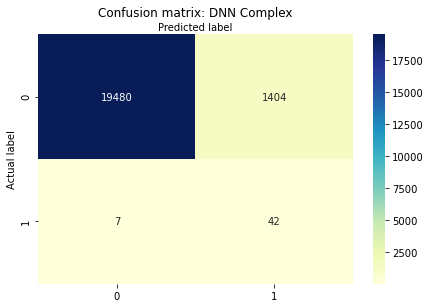

  No Skill : ROC AUC=0.500
DNN-Complex : ROC AUC=0.920


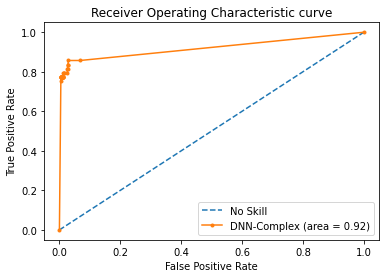

In [26]:
clf = create_complex_dnn()
clf.summary()
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# create/fit model on the training dataset
clf.fit(X_train, y_train, batch_size=16, epochs=32, verbose=0, sample_weight=np.where(y_train == 1,4.0,1.0).flatten())

# check model metrics
score = clf.evaluate(X_train, y_train, batch_size=128)
print('\nAnd the Train Score is ', score[1] * 100, '%')
score = clf.evaluate(X_test, y_test, batch_size=128)
print('\nAnd the Test Score is ', score[1] * 100, '%')
# predict probabilities for test set
yhat_probs = clf.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = clf.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print("Classification Report (DNN complex)") 
print(classification_report(y_test, yhat_classes))
tn, fp, fn, tp = display_metrics(clf, X_train, X_test, y_train, y_test, yhat_classes, 'DNN Complex')
visualize(y_test, yhat_classes, 'DNN Complex')
dnn_complex_auc = auc_roc_metrics(clf, X_test, y_test, 'DNN-Complex')
metrics_results['dnn_complex'] = dnn_complex_auc

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_23 (Dense)             (None, 31)                248       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 32        
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
210/210 [==============================] - 0s 133us/step

And the Train Score is  96.66666388511658 %
20933/20933 [=======

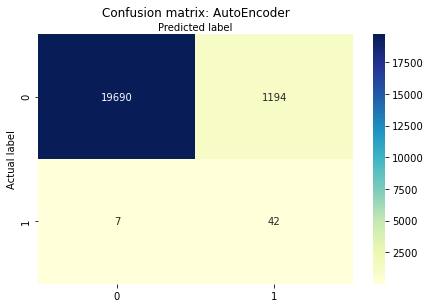

  No Skill : ROC AUC=0.500
AutoEncoder : ROC AUC=0.948


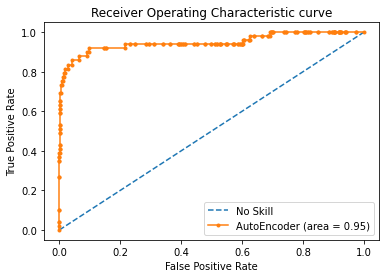

In [27]:
def create_autoencoder():
    # input_dim must equal number of features in X_train and X_test dataset
    clf1 = Sequential([
        Dense(units=15, kernel_initializer='uniform', input_dim=30, activation='tanh', 
              activity_regularizer=regularizers.l1(10e-5)),
        Dense(units=7, kernel_initializer='uniform', activation='relu'),
        Dense(units=7, kernel_initializer='uniform', activation='tanh'),
        Dense(units=31, kernel_initializer='uniform', activation='relu'),
        Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
    ])
    return clf1
clf = create_autoencoder()
clf.summary()
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# create/fit model on the training dataset
clf.fit(X_train, y_train, batch_size=16, epochs=32, verbose=0, sample_weight=np.where(y_train == 1,2.0,1.0).flatten())

# check model metrics
score = clf.evaluate(X_train, y_train, batch_size=32)
print('\nAnd the Train Score is ', score[1] * 100, '%')
score = clf.evaluate(X_test, y_test, batch_size=32)
print('\nAnd the Test Score is ', score[1] * 100, '%')
# predict probabilities for test set
yhat_probs = clf.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = clf.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print("Classification Report (AutoEncoder)") 
print(classification_report(y_test, yhat_classes))
tn, fp, fn, tp = display_metrics(clf, X_train, X_test, y_train, y_test, yhat_classes, 'AutoEncoder')
visualize(y_test, yhat_classes, 'AutoEncoder')
autoencoder_auc = auc_roc_metrics(clf, X_test, y_test, 'AutoEncoder')
metrics_results['autoencoder'] = autoencoder_auc

In [28]:
print("AUC comparisons")
print(metrics_results)

AUC comparisons
{'rf': 0.966, 'cnn': 0.921, 'dnn': 0.951, 'dnn_simple': 0.953, 'dnn_complex': 0.92, 'autoencoder': 0.948}


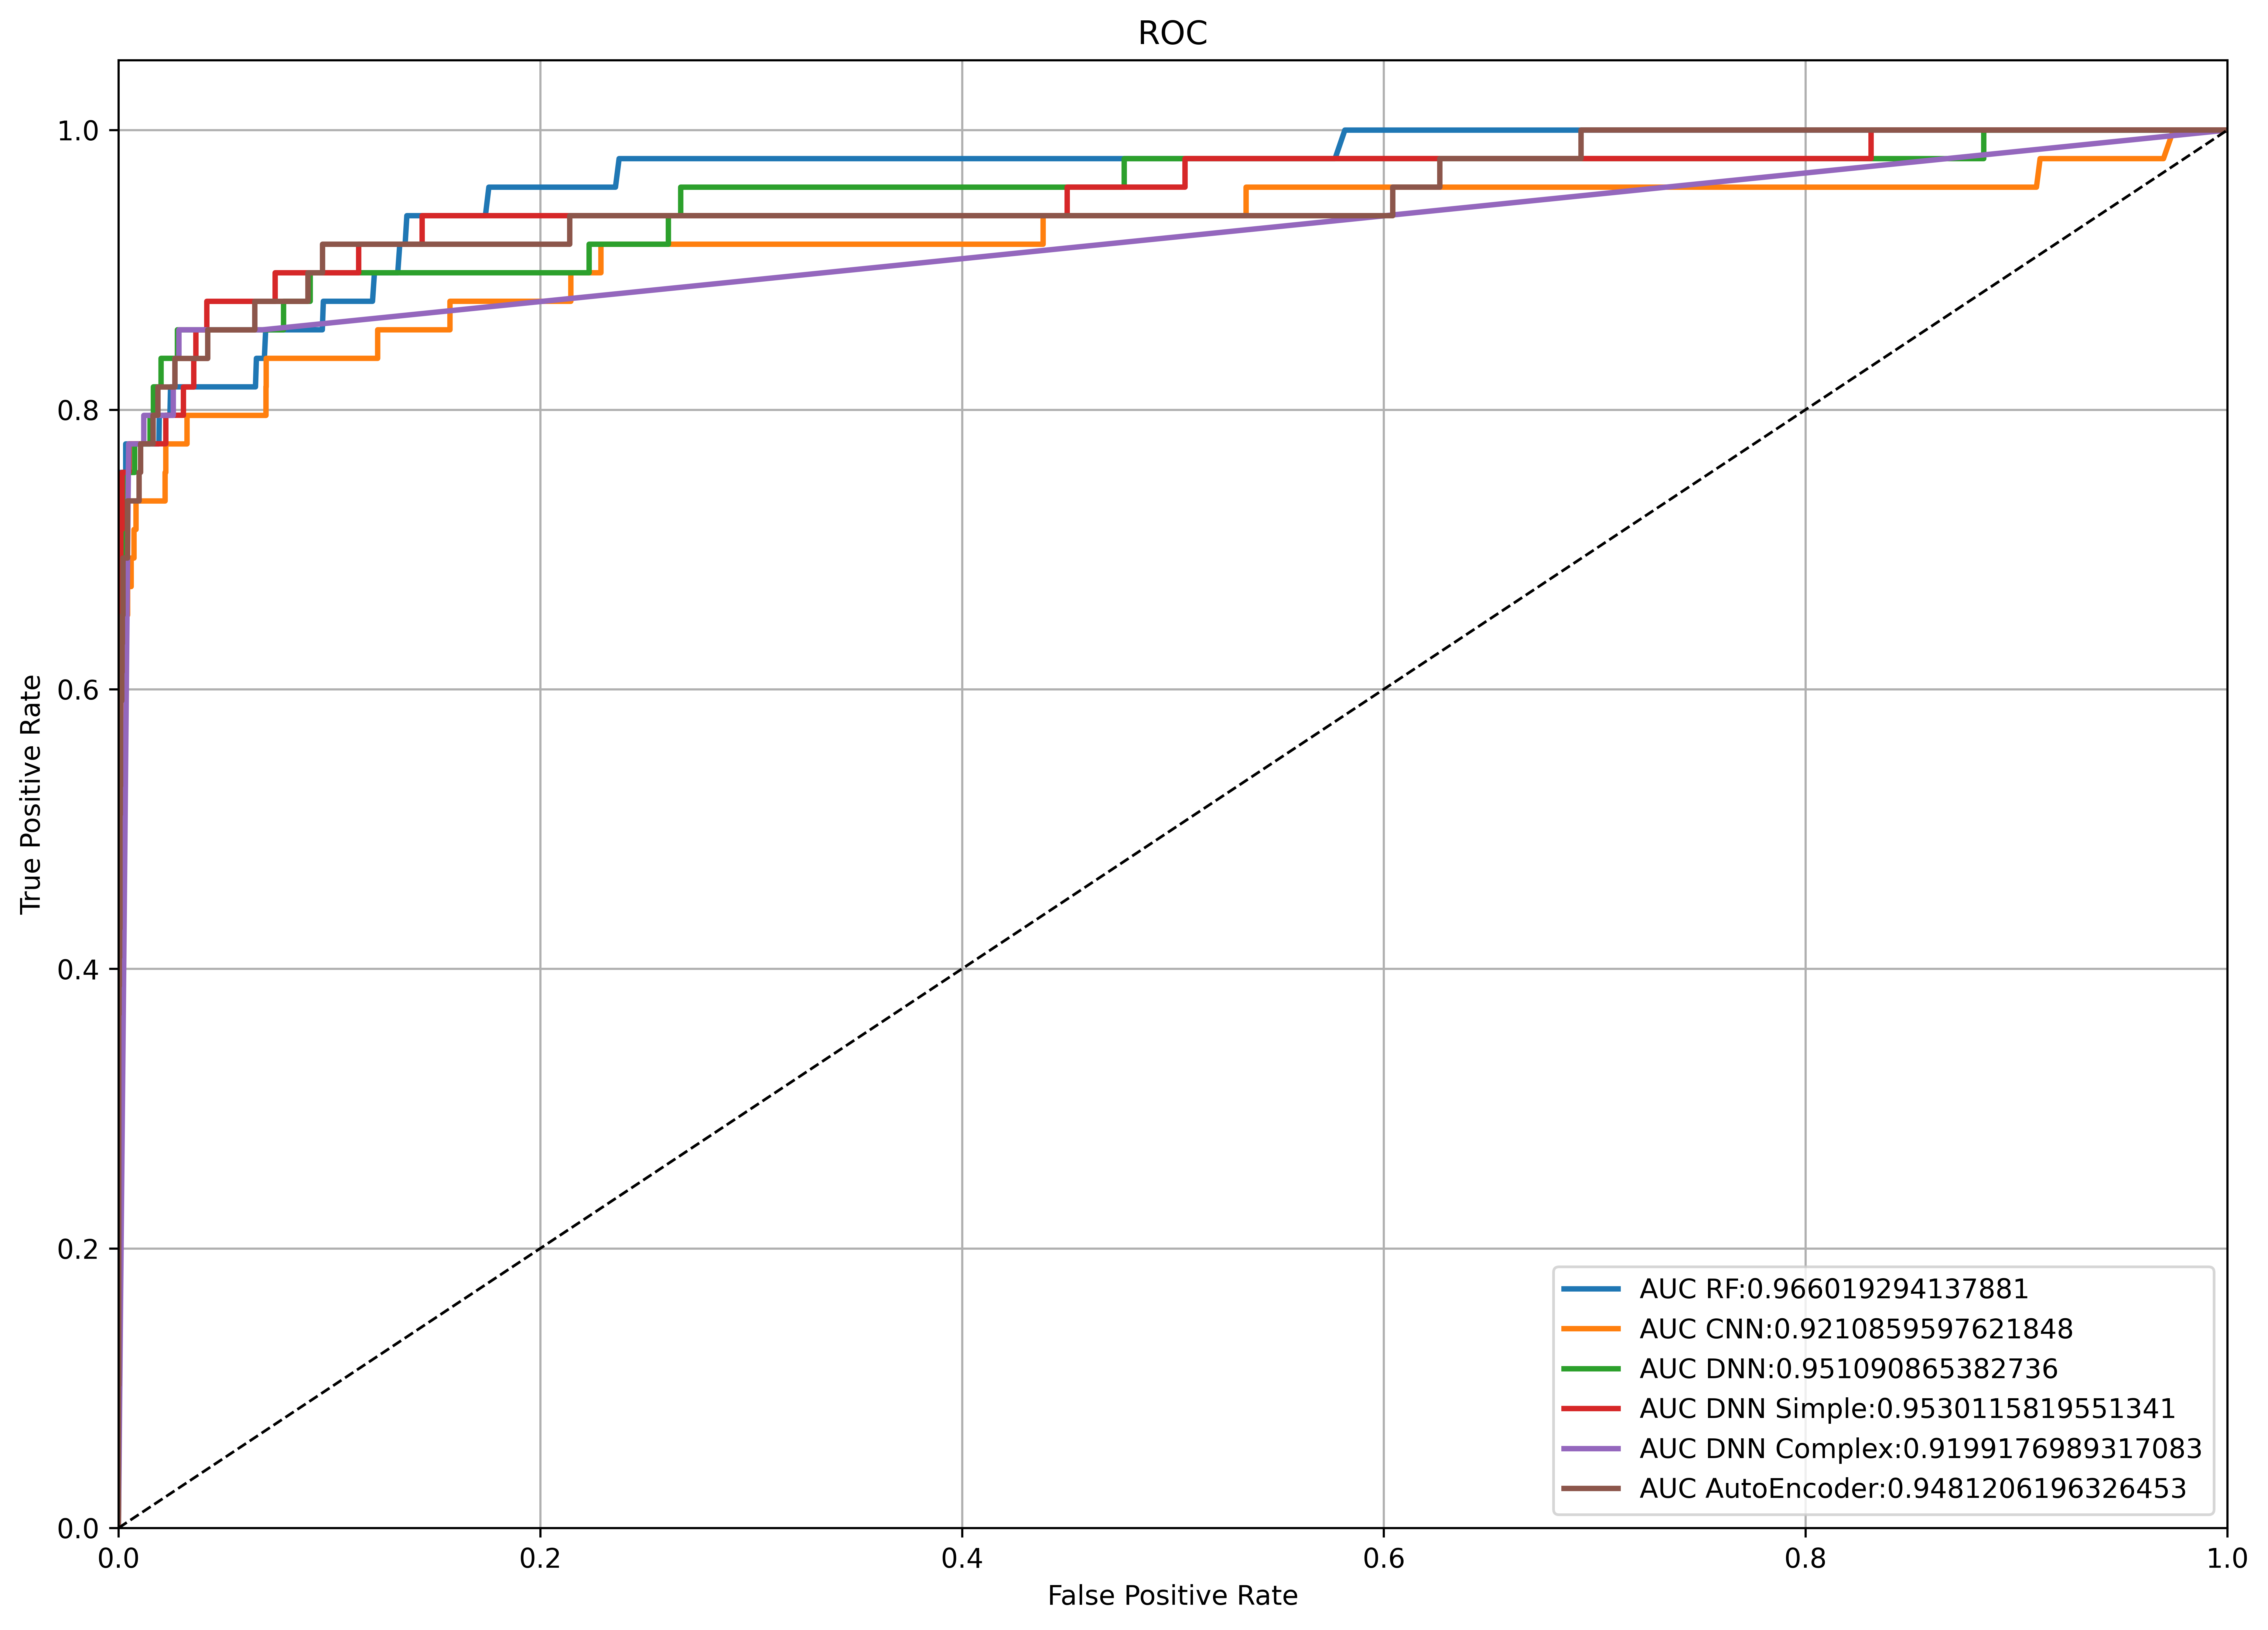

In [30]:
plt.figure(figsize=(14,10),dpi=640)

for i in range(0,len(roc)):
    auc1 = auc(roc[i][1],roc[i][2])
    plt.plot(roc[i][1],roc[i][2], label="AUC {0}:{1}".format(roc[i][0], auc1), linewidth=2)
    
plt.plot([0, 1], [0, 1], 'k--', lw=1) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate') 
plt.title('ROC') 
plt.grid(True)
plt.legend(loc="lower right")
plt.show()


Final confusion matrix results comparing the different algorithms. The items marked with ** are interim results for the 2 step process, and are not for comparison, only shown for reference. As you can see, both the FP and FN values are best for the 2 step process. This process is the most efficient at finding fraudulent transactions, and has the least amount of noise (FP).

number of Actual 0 and 1 in the final validation dataset for 2-test model "1" total should match the FN + TP

In [31]:
print(y_val['Class'].value_counts())

print("number of Actual 0 and 1 in the final test dataset for all other models 1 total should match the FN + TP")
print(y_test['Class'].value_counts())


0    8949
1      23
Name: Class, dtype: int64
number of Actual 0 and 1 in the final test dataset for all other models 1 total should match the FN + TP
0    20884
1       49
Name: Class, dtype: int64


In [32]:
########   Here are the final results in tabular form.
print(" FInal result *********")
final_results = pd.DataFrame(cm_results, columns=('algo','TN','FP','FN','TP')) 
final_results['SP'] = round(final_results['TN']/(final_results['TN'] + final_results['FP']), 3)
final_results['SE'] = round(final_results['TP']/(final_results['TP'] + final_results['FN']), 3)
final_results['Avg'] = (final_results['SP'] + final_results['SE'])/2
print('test, val, split settings')
print(spl1,spl2)
print('test, val, split sizes')
print( (spl1-spl1*spl2), (spl1*spl2) )
filtered = final_results[~final_results.algo.str.contains('a', regex= True, na=False)]
sort = filtered.sort_values(filtered.columns[7], ascending = False)
print(sort)
#sort.to_csv('results.csv', sep=',', mode='a', encoding='utf-8', header=True)




 FInal result *********
test, val, split settings
0.3 0.3
test, val, split sizes
0.21 0.09
          algo     TN    FP  FN  TP     SP     SE     Avg
5  AutoEncoder  19690  1194   7  42  0.943  0.857  0.9000
2          DNN  19227  1657   6  43  0.921  0.878  0.8995
4  DNN Complex  19480  1404   7  42  0.933  0.857  0.8950
0           RF  20251   633   9  40  0.970  0.816  0.8930
3   DNN Simple  20664   220  11  38  0.989  0.776  0.8825
1          CNN  19862  1022  10  39  0.951  0.796  0.8735
